<a href="https://colab.research.google.com/github/fahadshakeel23/DataScience/blob/main/ML2SupportingFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to manipulate data
import numpy as np
import pandas as pd

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to split data into train and test
from sklearn.model_selection import train_test_split

# to create a decision tree
from sklearn.tree import DecisionTreeClassifier

# to create ensemble models
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)


# to create extreme gradient boosting
from xgboost import XGBClassifier


# to evaluate models
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# to tune  models
from sklearn.model_selection import GridSearchCV


#---------------------------------------------------------
# Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
visa = pd.read_csv('/content/drive/MyDrive/EasyVisa.csv')

In [ ]:
data = visa.copy()

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.shape

(25480, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 25480 rows and 12
columns
There are no missing values in the dataset
There are no duplicate values in the dataset
no_of_employees, yr_of_estab, and prevailing_wage are numeric features while rest are objects
the no of employees has a mean of 5,667 and median of 2,109. This indicates that the distribution is skewed
there are negative values in the no of employees which could be an error
yr of estab ranges from 1800 to 2016
prevailing wage ranges from 2 to 319,210 and distribution is skewed
The most popular continent is Asia
The most popular educational level is Bachelor


In [ ]:
data.loc[data['no_of_employees']<0].shape

(33, 12)

In [ ]:
data['no_of_employees'] = abs(data['no_of_employees'])

In [ ]:
obj_col =list(data.select_dtypes("object").columns)

for column in obj_col:
  print(data[column].value_counts(True))
  print("_" * 50)

case_id
EZYV25480    0.000039
EZYV01       0.000039
EZYV02       0.000039
EZYV03       0.000039
EZYV04       0.000039
               ...   
EZYV13       0.000039
EZYV12       0.000039
EZYV11       0.000039
EZYV10       0.000039
EZYV09       0.000039
Name: proportion, Length: 25480, dtype: float64
__________________________________________________
continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
__________________________________________________
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
__________________________________________________
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
__________________________________________________
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, 

case id can be removed as it is not needed
66% of the applications are from Asians
40% of the applicants have a bachelor's degree
58% of the applicants have job experience
88% of the applicants do not require job training
28% of the applicants have their worksite in the Northeast region of the US
90% of the applicants have a yearly unit of wage
89% of the visa applications are having a full-time job positions
66% of the case status are certified
The target variable is imbalanced

In [ ]:
data. drop(["case_id"], axis=1, inplace=True)

## **`Exploratory Data Analysis`**

Univariate Analysis

In [ ]:
# for numerical variables
def histogram_boxplot(data, feature, figsize=(15,10), kde=False, bins=None):
  """
  Boxplot and histogram combined

  data:dataframe
  feature:dataframe column
  figsize: size of figure (default(15,10))
  kde: whether to show the density curve (default False)
  bins: number of bins for histogram (default None)
  """
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2,
      sharex=True,
      gridspec_kw = {"height_ratios": (0.25, 0.75)},
      figsize=figsize,
  )
  sns.boxplot(
      data=data, x=feature, ax=ax_box2, showmeans= True, color="violet"
  )
  sns.histplot(
      data= data, x=feature, kde=kde, ax=ax_hist2, bins=bins
  ) if bins else sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2
  )
  ax_hist2.axvline(
      data[feature].mean(), color="green", linestyle="--"
  )
  ax_hist2.axvline(
      data[feature].median(), color="black", linestyle="-"
  )


In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

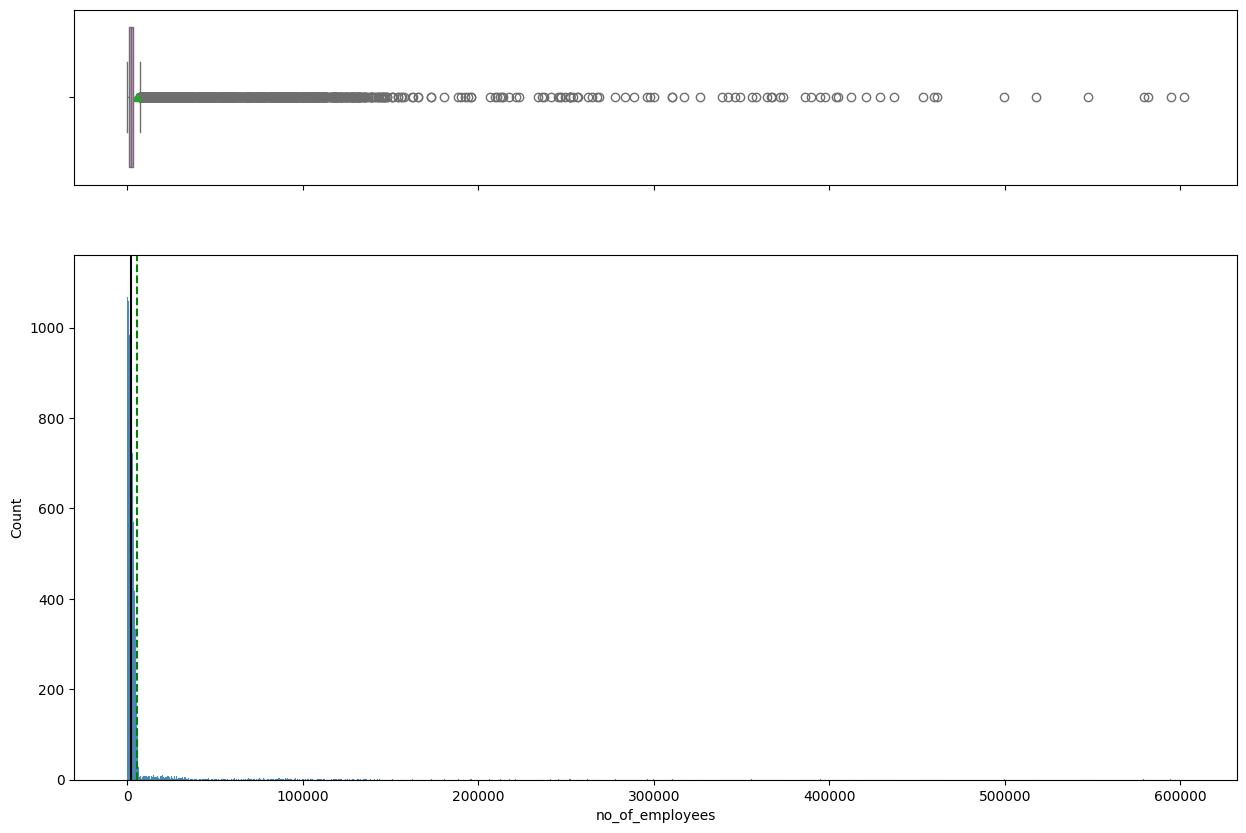

In [ ]:
histogram_boxplot(data, 'no_of_employees')

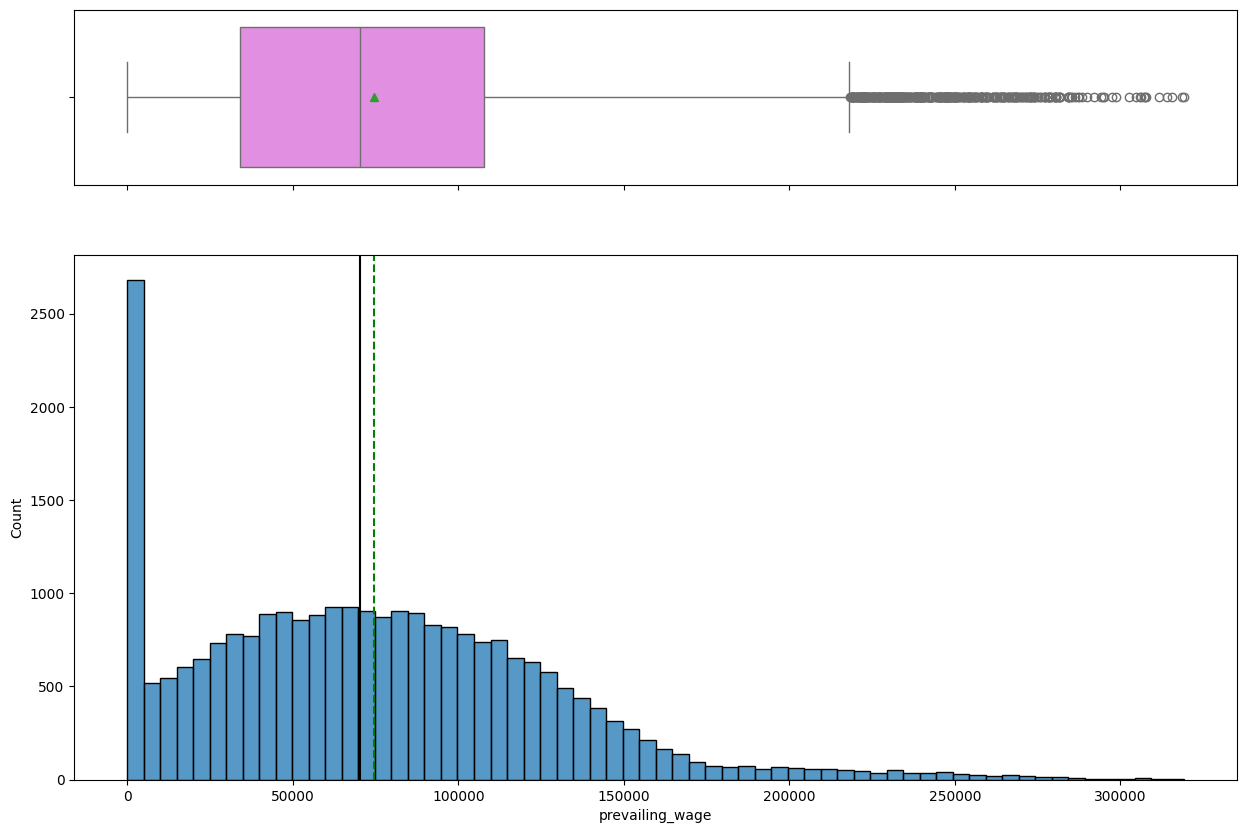

In [ ]:
histogram_boxplot(data, 'prevailing_wage')

In [ ]:
data.loc[data['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

,count
unit_of_wage,
Hour,176


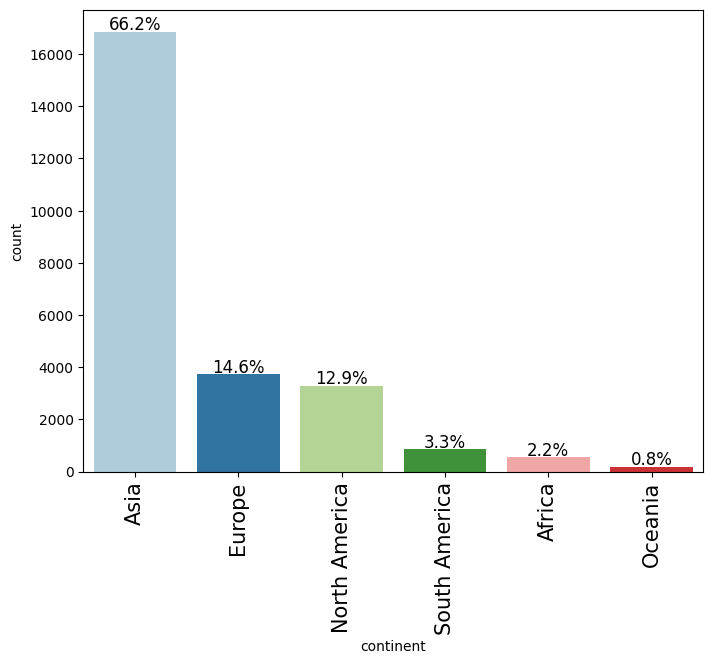

In [ ]:
labeled_barplot(data, "continent", perc=True)

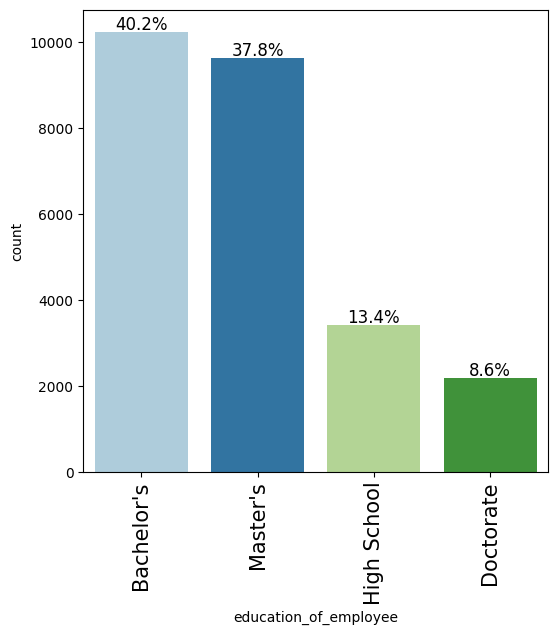

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

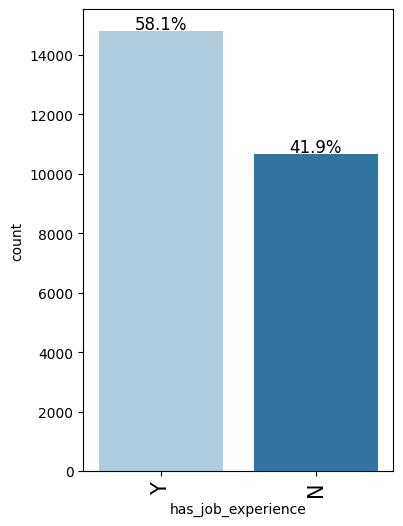

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

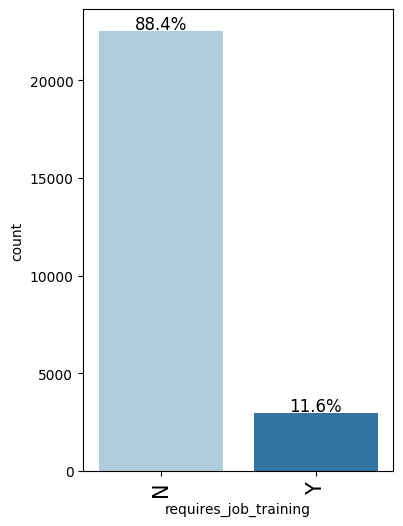

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

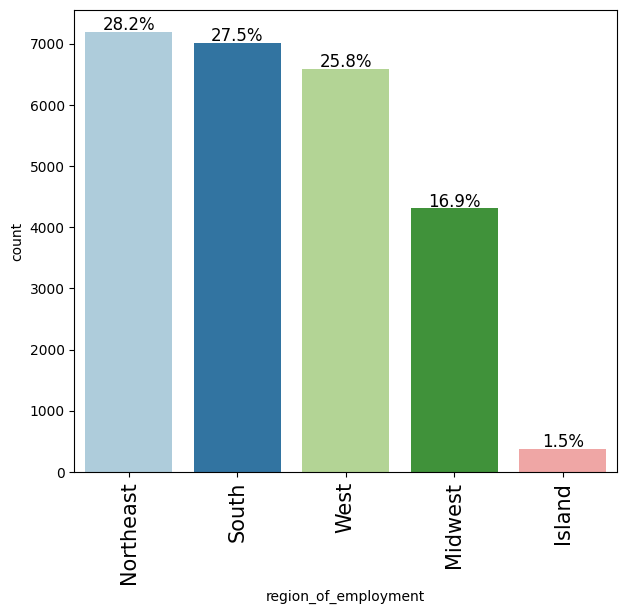

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

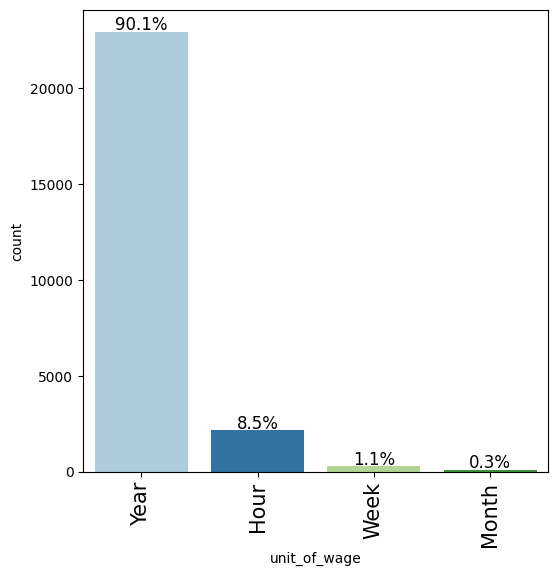

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

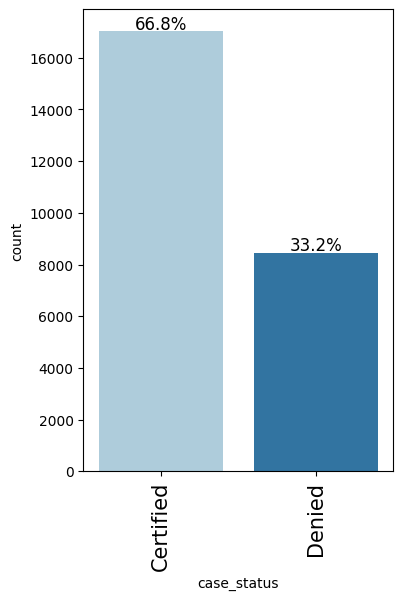

In [ ]:
labeled_barplot(data, "case_status", perc=True)

Bivariate Analysis

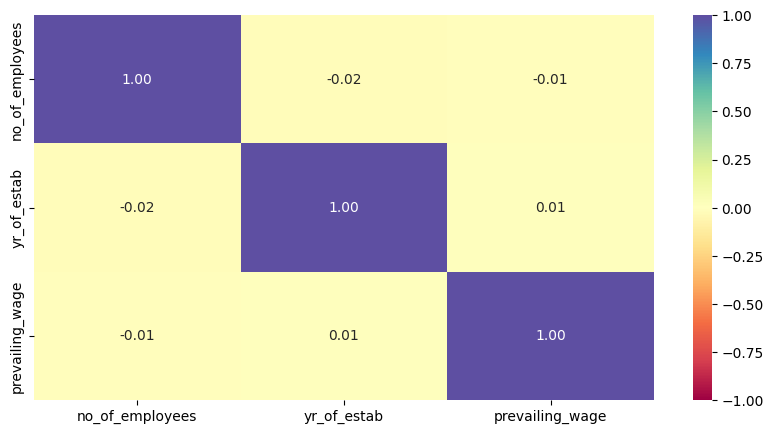

In [ ]:
# seperate the numerical values
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# create the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


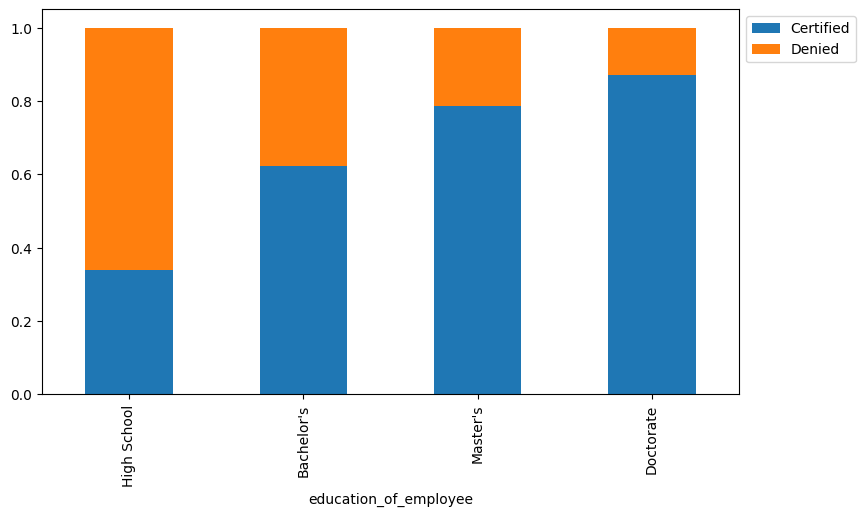

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

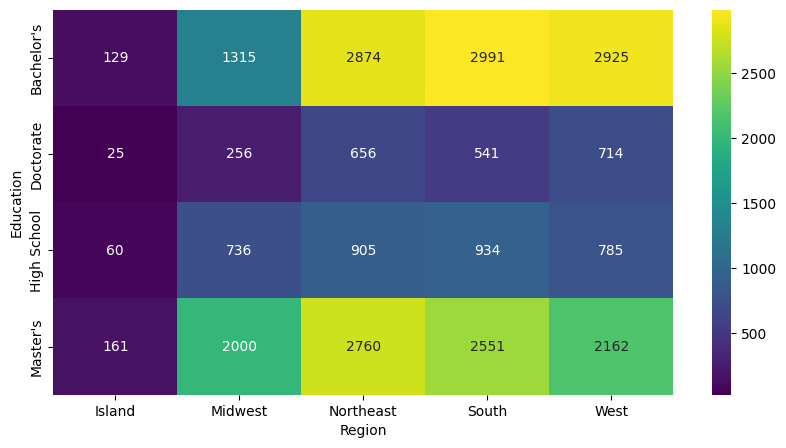

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


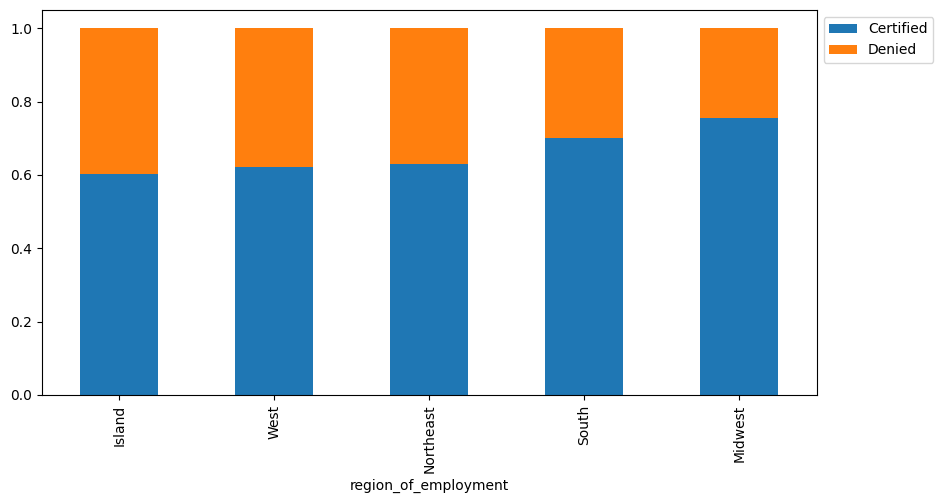

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status")

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


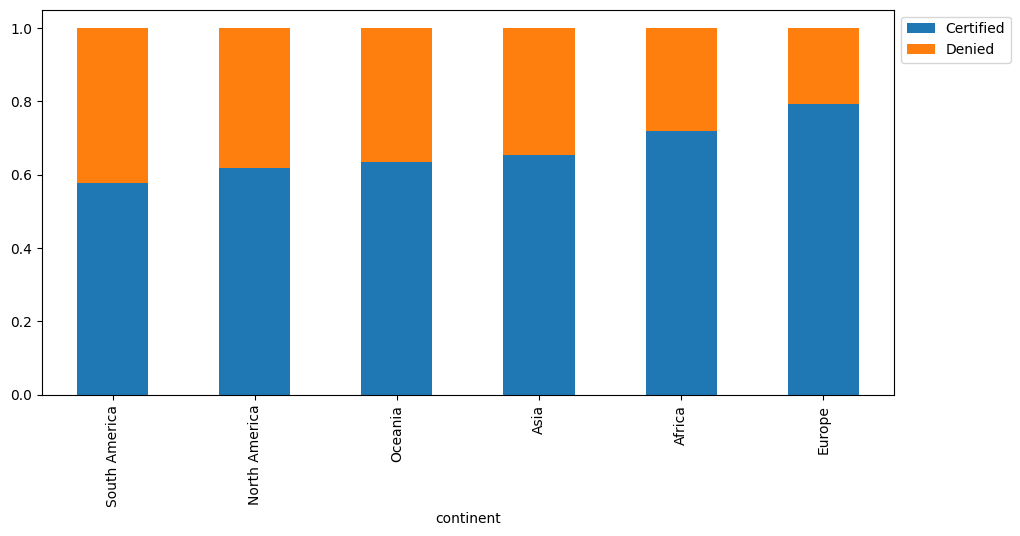

In [ ]:
stacked_barplot(data, "continent", "case_status")

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


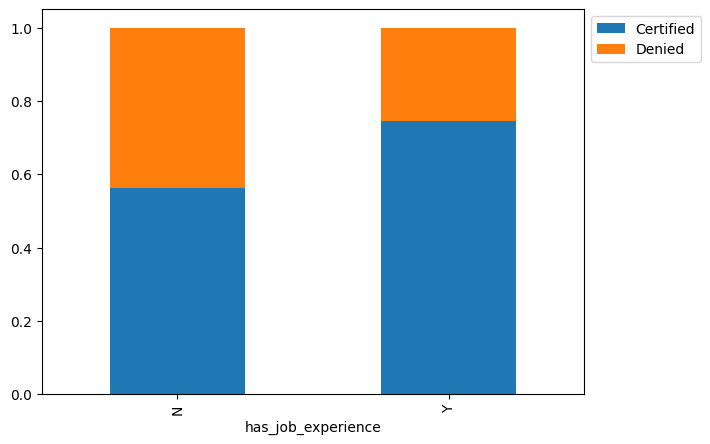

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


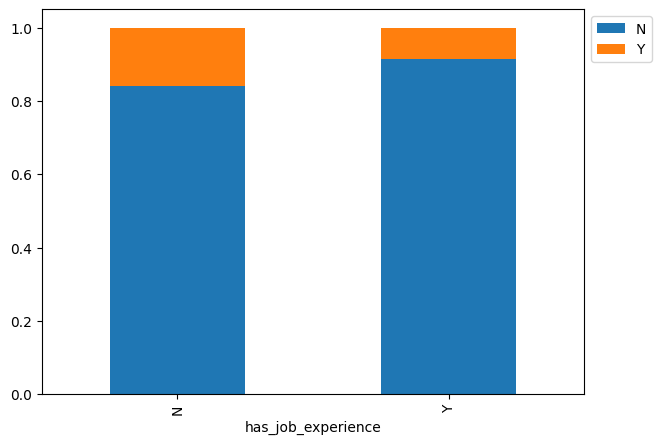

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

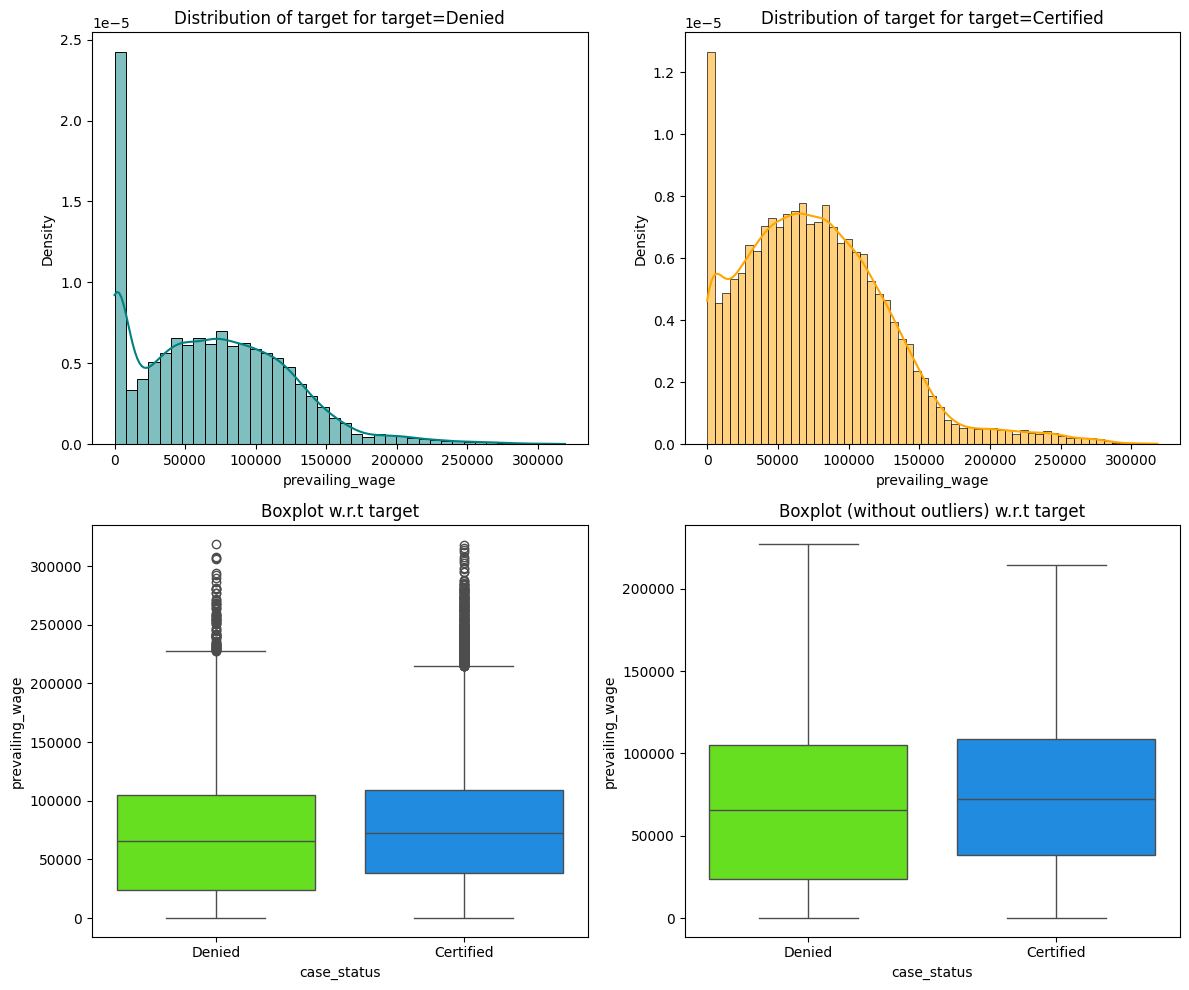

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

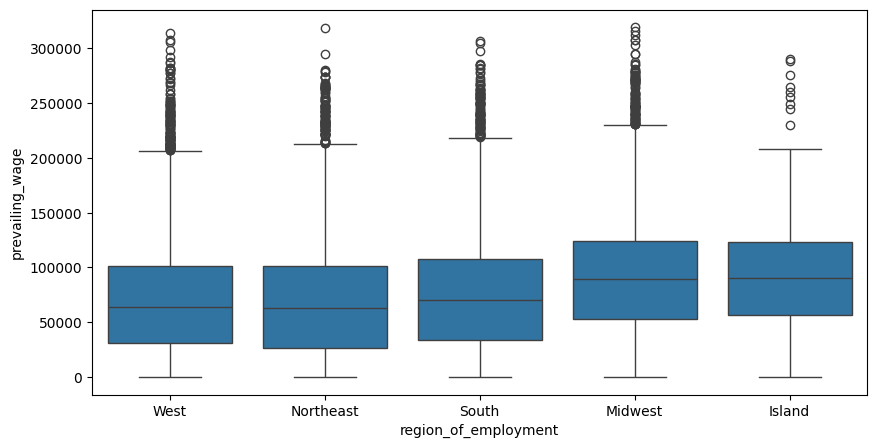

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()


case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


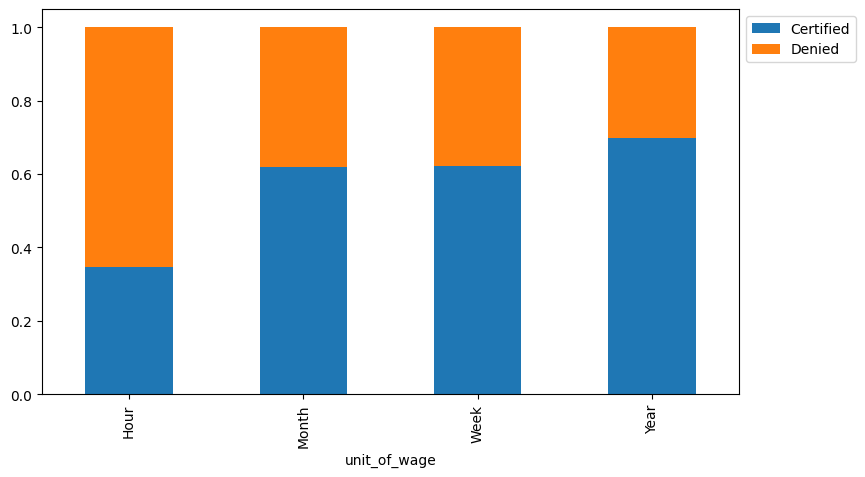

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

**Data Pre-processing**

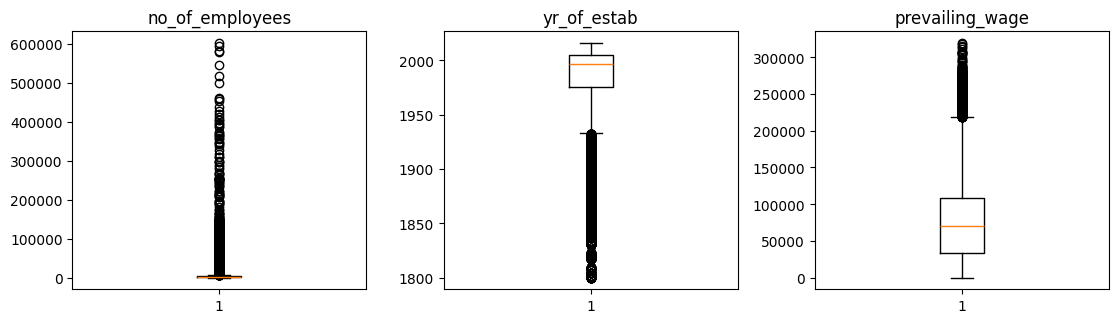

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data["case_status"]=data["case_status"].apply(lambda x:1 if x == "Certified" else 0)

In [ ]:
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify= Y)

In [ ]:
print("shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


In [ ]:
def model_perfomance_classification_sklearn(model, predictors, target):
  """
  Funtion to compute different metrices to check classification model perfomance

  model: classifier
  predictors: independent variables
  target: target variable
  """

  pred = model.predict(predictors)

  acc = accuracy_score(target, pred)

  recall = recall_score(target, pred)
  precision = precision_score(target, pred)

  f1 = f1_score(target, pred)

  df_perf = pd.DataFrame(
      {"Accuracy": acc, "Recall":recall, "Precision": precision, "F1 Score": f1},
      index=[0],
  )

  return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
  """
  To plot the confusion_matrix with percentages

  model: classifier
  predictors: independent variables
  target: dependent variable
  """
  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  labels = np.asarray(
      [
          ["{0:0.0f}". format(item) + "\n{0:.2%}".format(
              item / cm.flatten().sum()
          )] for item in cm.flatten()
      ]
  ).reshape(2,2)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=labels, fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

Decision Tree - Model Building and Hyperparameter Tuning

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

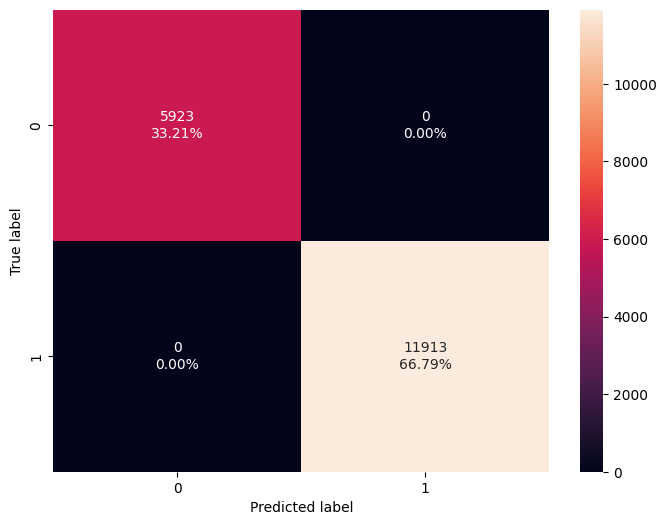

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_perfomance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


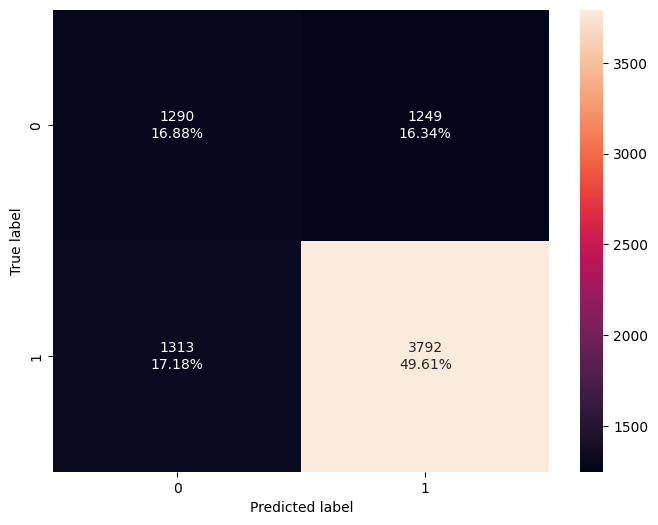

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_perfomance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1 Score
0,0.664835,0.742801,0.752232,0.747487


In [ ]:
dtree_estimator = DecisionTreeClassifier(class_weight = "balanced", random_state=1)

parameters = {
    "max_depth":np.arange(10, 30, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

dtree_estimator = grid_obj.best_estimator_

dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(10),
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       min_samples_leaf=3, random_state=1)

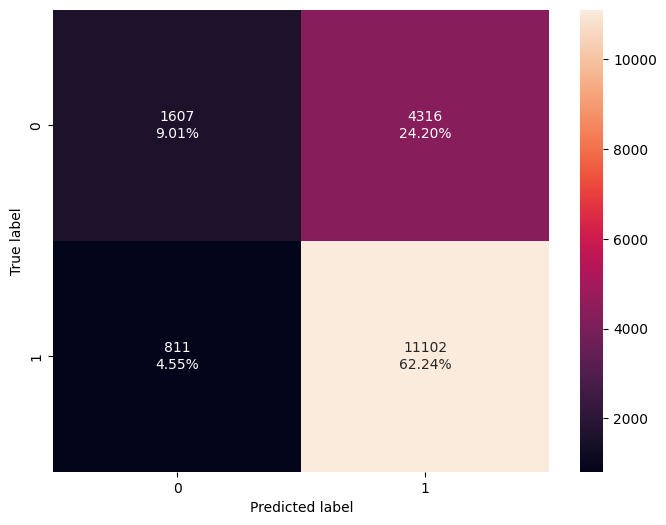

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
dtree_estimator_model_train_perf = model_perfomance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.712548,0.931923,0.720067,0.812411


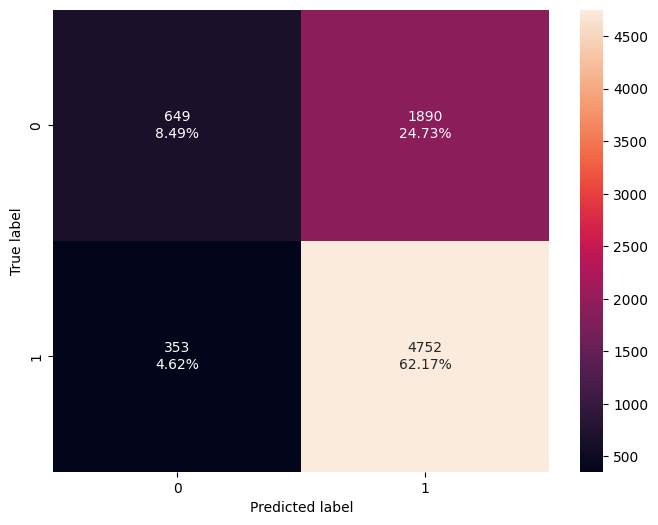

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
dtree_estimator_model_test_perf = model_perfomance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.706567,0.930852,0.715447,0.809058


The model is a good fit and not suffering from overfitting

In [ ]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

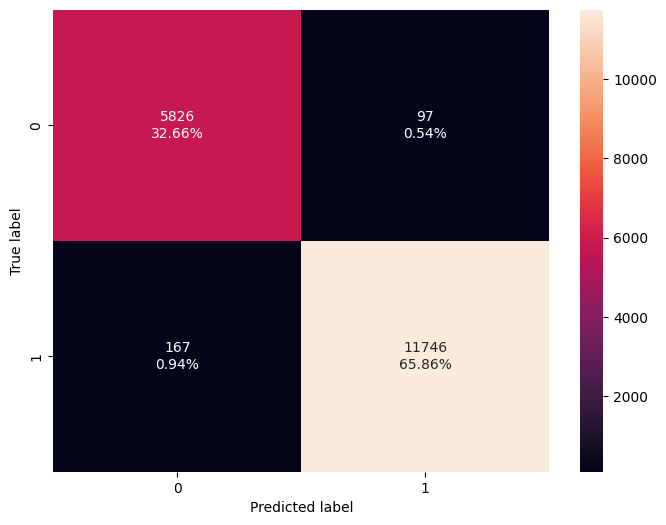

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [ ]:
bagging_classifier_model_train_perf = model_perfomance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.985198,0.985982,0.99181,0.988887


Checking model performance on test set

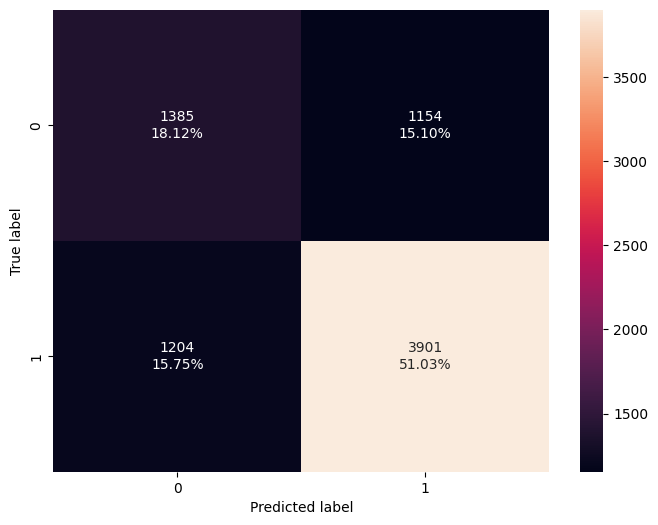

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [ ]:
bagging_classifier_model_test_perf = model_perfomance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.691523,0.764153,0.771711,0.767913


In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

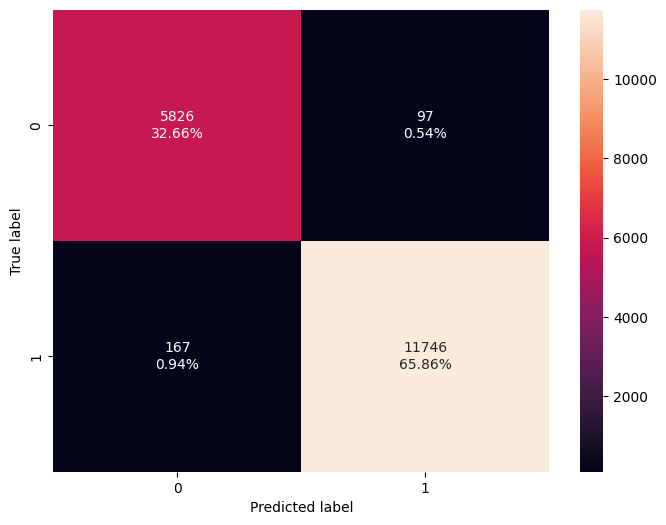

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
bagging_model_train_perf=model_perfomance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision  F1 Score
0  0.985198  0.985982    0.99181  0.988887


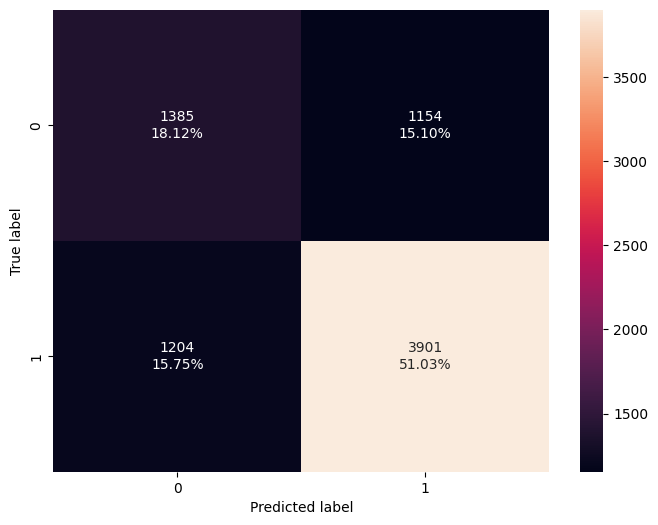

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_test_perf=model_perfomance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision  F1 Score
0  0.691523  0.764153   0.771711  0.767913


Random Forest

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced")
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

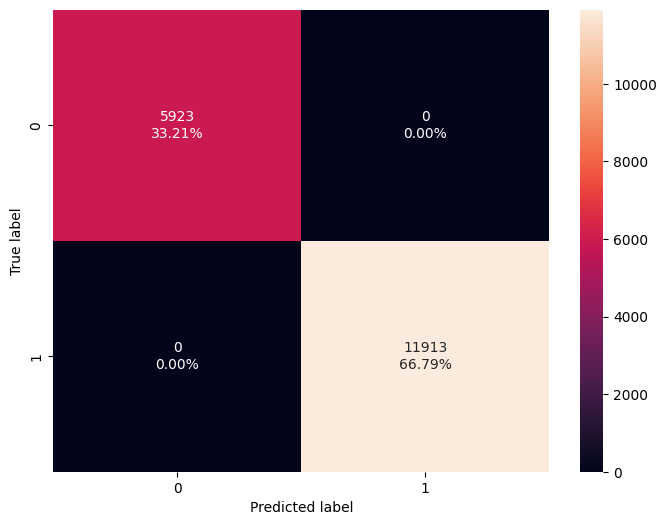

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
rf_estimator_model_train_perf = model_perfomance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


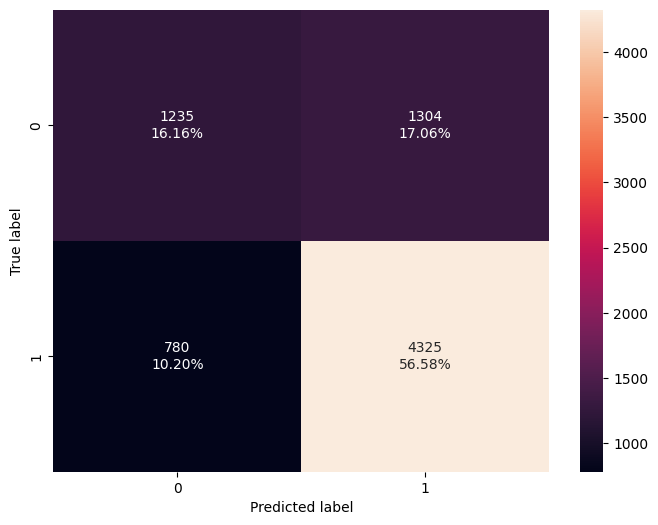

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
rf_estimator_model_test_perf = model_perfomance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.727368,0.847209,0.768343,0.805851


Hyperparameter Tuning - Random Forest

In [ ]:
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(10), min_samples_split=7,
                       n_estimators=np.int64(20), oob_score=True,
                       random_state=1)

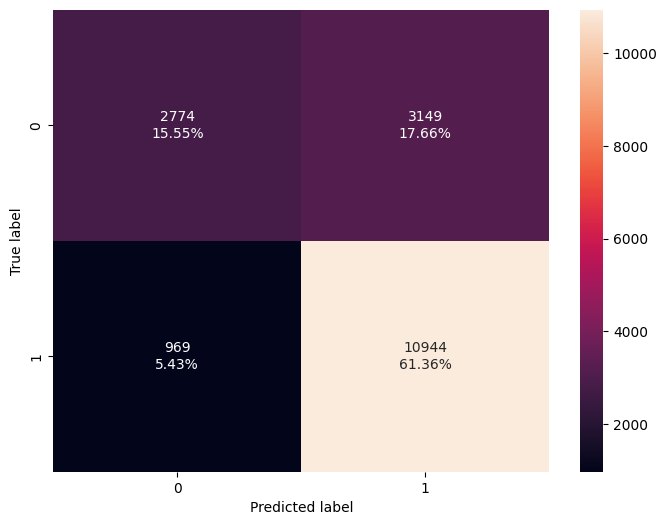

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)


In [ ]:
rf_tuned_model_train_perf = model_perfomance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.769119,0.91866,0.776556,0.841652


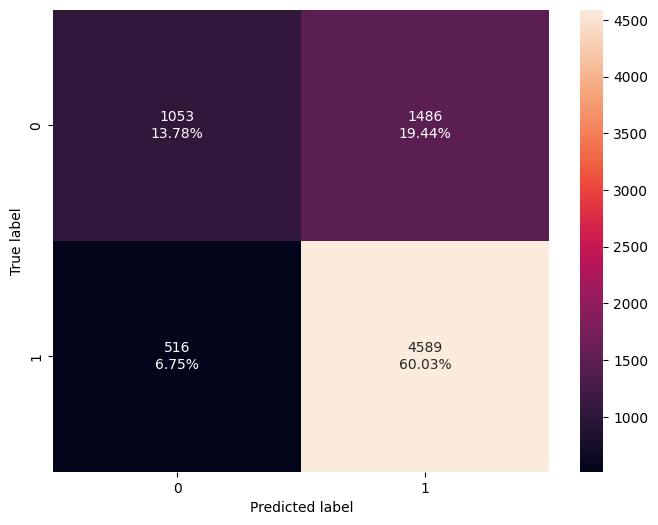

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_model_test_perf = model_perfomance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.738095,0.898923,0.755391,0.82093


Boosting - Model Building and Hyperparameter Tuning

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

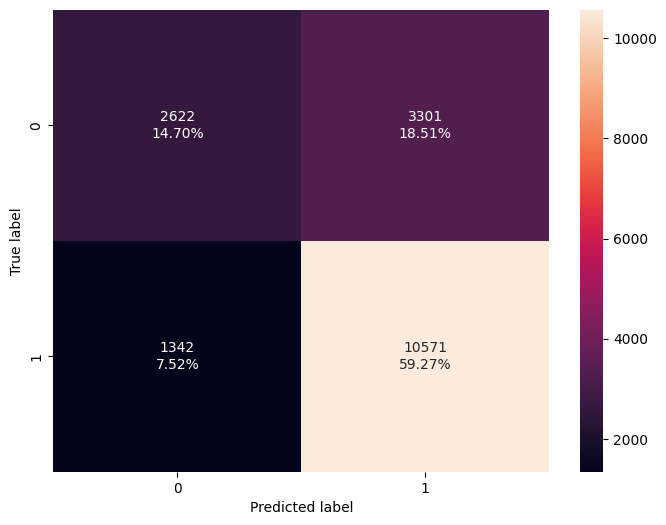

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [ ]:
ab_classifier_model_train_perf = model_perfomance_classification_sklearn(
    ab_classifier, X_train, y_train
)
ab_classifier_model_train_perf


,Accuracy,Recall,Precision,F1 Score
0,0.739684,0.88735,0.762039,0.819934


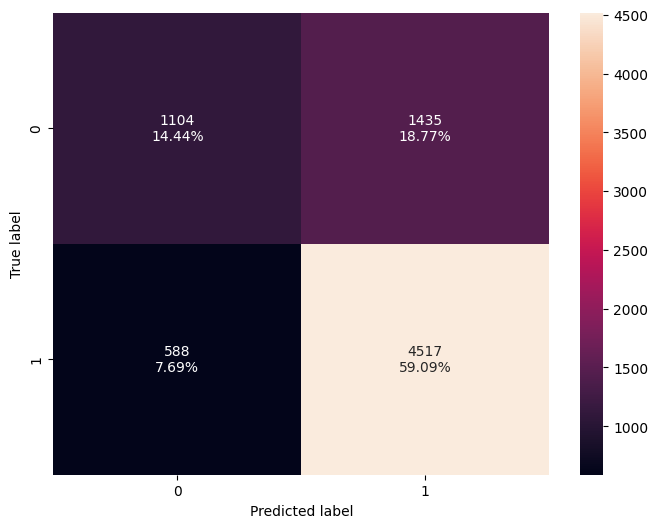

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [ ]:
ab_classifier_model_test_perf = model_perfomance_classification_sklearn(
    ab_classifier, X_test, y_test
)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.735348,0.884819,0.758905,0.817039


Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Define the base model
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(60, 100, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Scoring
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5, verbose=1)
grid_obj = grid_obj.fit(X_train, y_train.ravel())  # Ensure y is 1D

# Best model
abc_tuned = grid_obj.best_estimator_

# Fit the best model
abc_tuned.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1,
                                                    random_state=1),
                   learning_rate=np.float64(0.1), n_estimators=np.int64(60),
                   random_state=1)

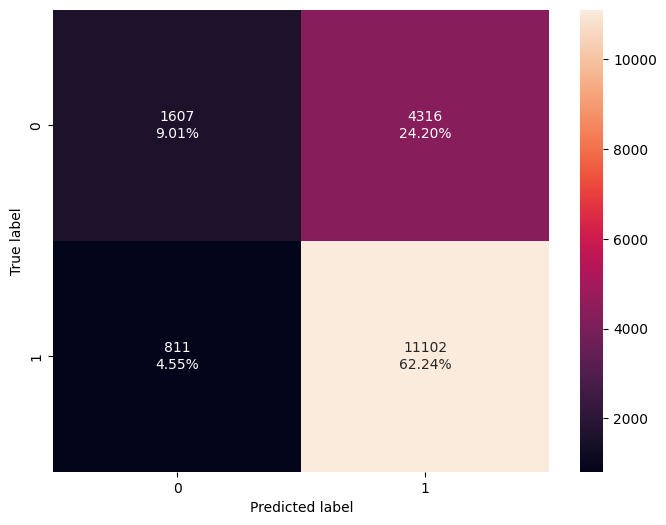

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [ ]:
abc_tuned_model_train_perf = model_perfomance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.712548,0.931923,0.720067,0.812411


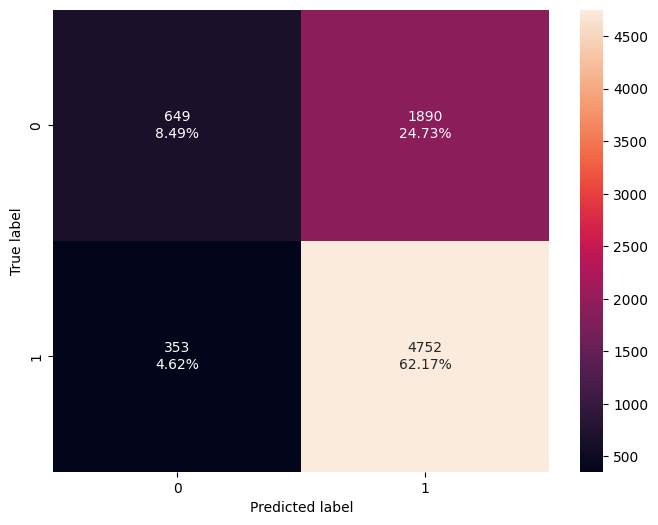

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
abc_tuned_model_test_perf = model_perfomance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.706567,0.930852,0.715447,0.809058


Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

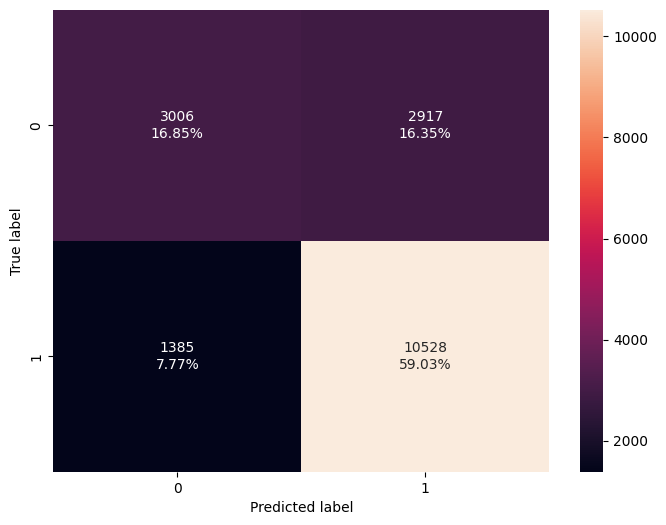

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [ ]:
gb_classifier_model_train_perf = model_perfomance_classification_sklearn(
    gb_classifier, X_train, y_train
)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.758802,0.88374,0.783042,0.830349


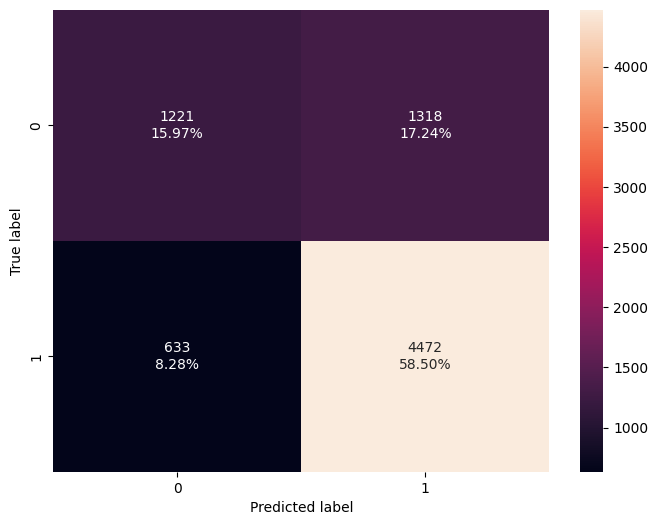

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [ ]:
gb_classifier_model_test_perf = model_perfomance_classification_sklearn(
    gb_classifier, X_test, y_test
)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.744767,0.876004,0.772366,0.820927


Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Initialize GradientBoostingClassifier with AdaBoost
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    random_state=1
)

# ✅ Reduced parameter grid for quicker testing
parameters = {
    "n_estimators": [200],        # You can expand later to [200, 250, 300]
    "subsample": [0.9],           # Reduced from [0.8, 0.9, 1]
    "max_features": [0.8],        # Reduced from [0.7, 0.8, 0.9, 1]
    "learning_rate": [0.1],       # Reduced from np.arange(0.1, 0.4, 0.1)
}

# ✅ F1 scorer for evaluation
acc_scorer = metrics.make_scorer(metrics.f1_score)

# ✅ Use a smaller subset of the data for testing grid search
X_sample = X_train[:1000]
y_sample = y_train[:1000].ravel()  # Ensure y is 1D

# ✅ Grid search with fewer CV folds and verbose logging
grid_obj = GridSearchCV(
    estimator=gbc_tuned,
    param_grid=parameters,
    scoring=acc_scorer,
    cv=3,               # Reduced from 5 to 3
    verbose=1,
    n_jobs=-1           # Use all CPU cores
)

# Run grid search
grid_obj = grid_obj.fit(X_sample, y_sample)

# Get the best estimator
gbc_tuned = grid_obj.best_estimator_

# ✅ Final fit on the full training data
gbc_tuned.fit(X_train, y_train.ravel())


Fitting 3 folds for each of 1 candidates, totalling 3 fits


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.9)

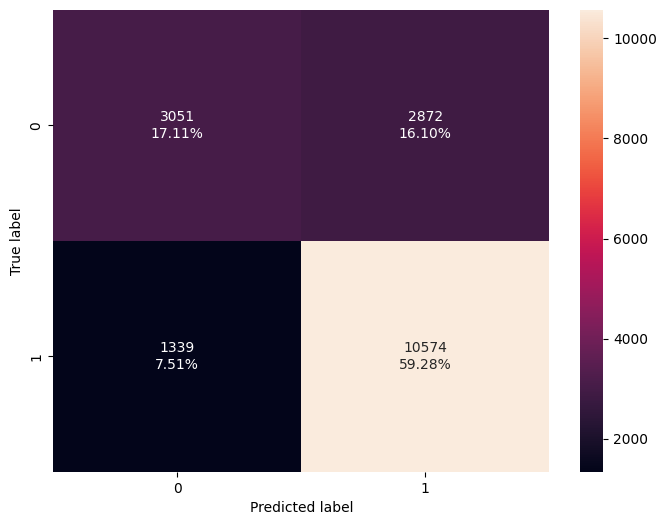

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_model_train_perf = model_perfomance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.763904,0.887602,0.786405,0.833945


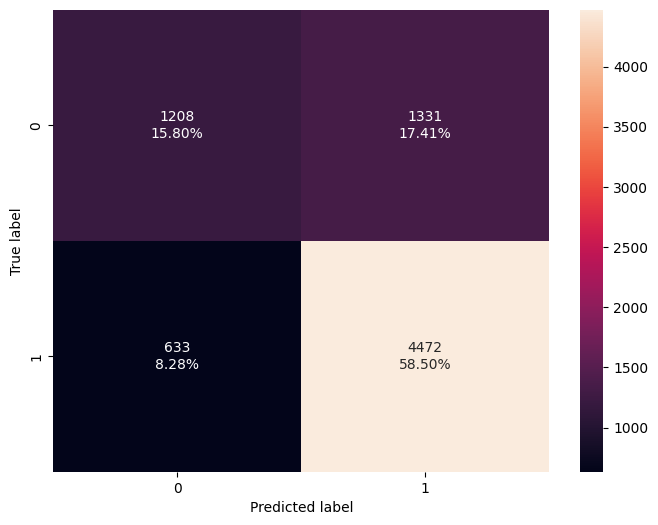

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_model_test_perf = model_perfomance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.743066,0.876004,0.770636,0.819949


XGBoost Classifier

In [ ]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

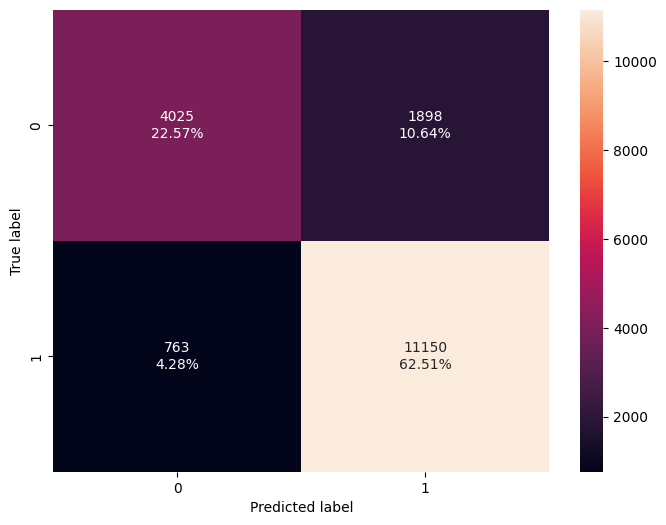

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [ ]:
xgb_classifier_model_train_perf = model_perfomance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.850807,0.935952,0.854537,0.893394


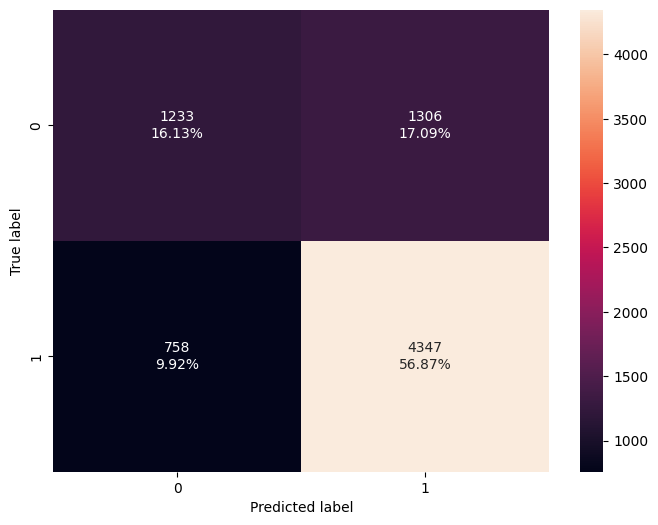

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [ ]:
xgb_classifier_model_test_perf = model_perfomance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.729984,0.851518,0.768972,0.808143


Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Base model with a fixed eval_metric
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss", use_label_encoder=False)

# ✅ Reduced hyperparameter grid for faster testing
parameters = {
    "n_estimators": [150],             # From [150, 200]
    "scale_pos_weight": [1],           # From [1, 2]
    "subsample": [0.9],                # From [0.9, 1]
    "learning_rate": [0.1],            # From np.arange(0.1, 0.21, 0.1)
    "gamma": [3],                      # From [3, 5]
    "colsample_bytree": [0.8],         # From [0.8, 0.9]
    "colsample_bylevel": [0.9],        # From [0.9, 1]
}

# Scorer
acc_scorer = metrics.make_scorer(metrics.f1_score)

# ✅ Sample a smaller subset of data to test the pipeline
X_sample = X_train[:1000]
y_sample = y_train[:1000].ravel()

# ✅ GridSearchCV with fewer folds and parallel execution
grid_obj = GridSearchCV(
    estimator=xgb_tuned,
    param_grid=parameters,
    scoring=acc_scorer,
    cv=3,           # Reduced from 5 to 3
    verbose=1,
    n_jobs=-1       # Use all CPU cores
)

# Run the grid search
grid_obj.fit(X_sample, y_sample)

# Use the best model
xgb_tuned = grid_obj.best_estimator_

# ✅ Final training on the full dataset
xgb_tuned.fit(X_train, y_train.ravel())


Fitting 3 folds for each of 1 candidates, totalling 3 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

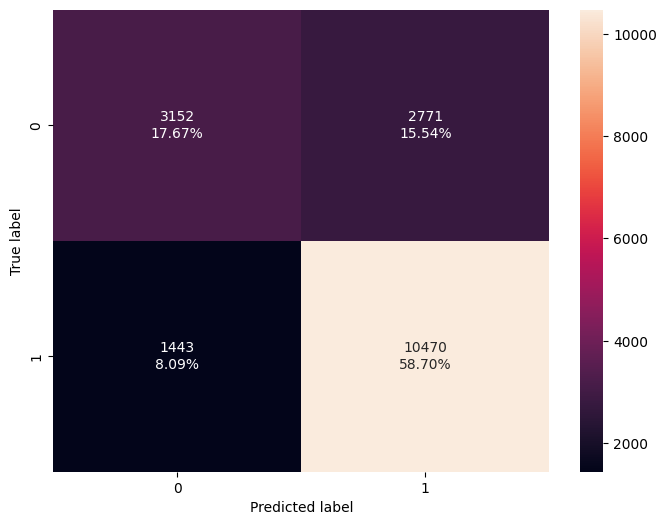

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
xgb_tuned_model_train_perf = model_perfomance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.763736,0.878872,0.790726,0.832472


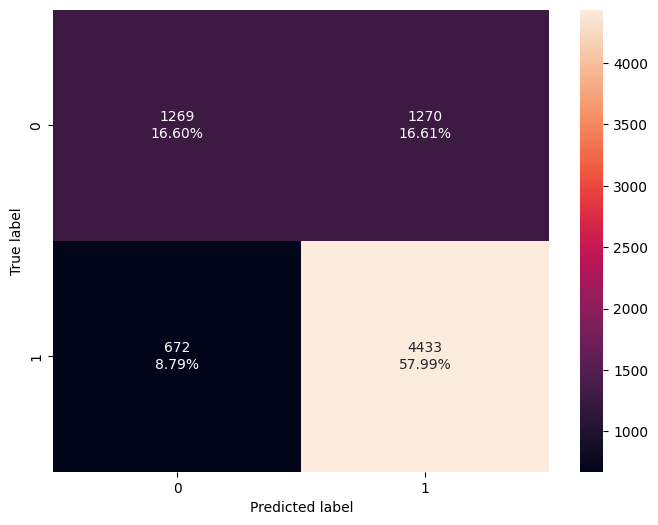

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
xgb_tuned_model_test_perf = model_perfomance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.745945,0.868364,0.77731,0.820318


Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=np.int64(10),
                                                       min_samples_split=7,
                                                       n_estimators=np.int64(20),
                                                       oob_score=T...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

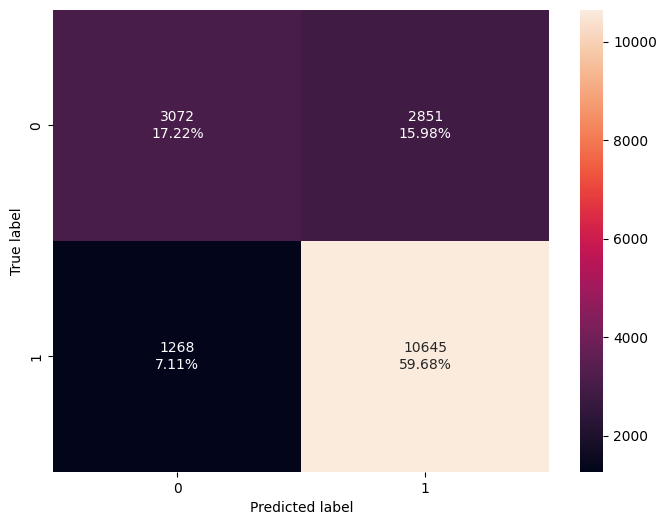

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [ ]:
stacking_classifier_model_train_perf = model_perfomance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.769063,0.893562,0.788752,0.837892


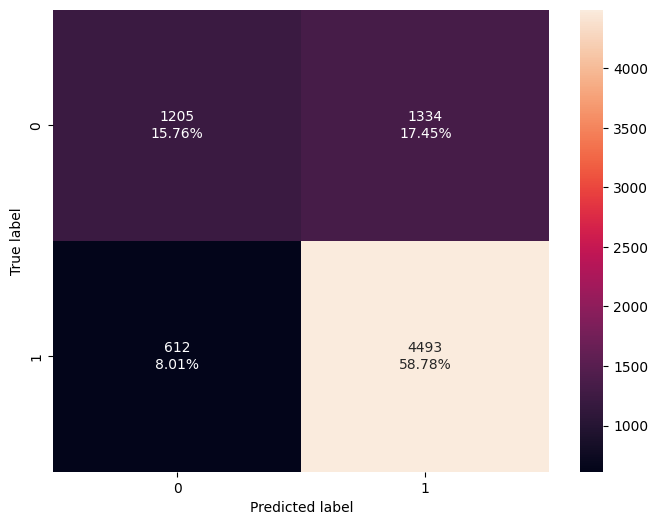

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [ ]:
stacking_classifier_model_test_perf = model_perfomance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.745421,0.880118,0.771066,0.82199


**Comparing all models**

In [ ]:
models_train_comp_df = pd.concat(
    [
        dtree_estimator_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.712548,0.712548,0.985198,1.0,0.769119,0.739684,0.712548,0.758802,0.763904,0.850807,0.763736,0.769063
Recall,0.931923,0.931923,0.985982,1.0,0.918660,0.887350,0.931923,0.883740,0.887602,0.935952,0.878872,0.893562
Precision,0.720067,0.720067,0.991810,1.0,0.776556,0.762039,0.720067,0.783042,0.786405,0.854537,0.790726,0.788752
F1 Score,0.812411,0.812411,0.988887,1.0,0.841652,0.819934,0.812411,0.830349,0.833945,0.893394,0.832472,0.837892


In [ ]:
models_test_comp_df = pd.concat(
    [
        dtree_estimator_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.706567,0.706567,0.691523,0.727368,0.738095,0.735348,0.706567,0.744767,0.743066,0.729984,0.745945,0.745421
Recall,0.930852,0.930852,0.764153,0.847209,0.898923,0.884819,0.930852,0.876004,0.876004,0.851518,0.868364,0.880118
Precision,0.715447,0.715447,0.771711,0.768343,0.755391,0.758905,0.715447,0.772366,0.770636,0.768972,0.777310,0.771066
F1 Score,0.809058,0.809058,0.767913,0.805851,0.820930,0.817039,0.809058,0.820927,0.819949,0.808143,0.820318,0.821990


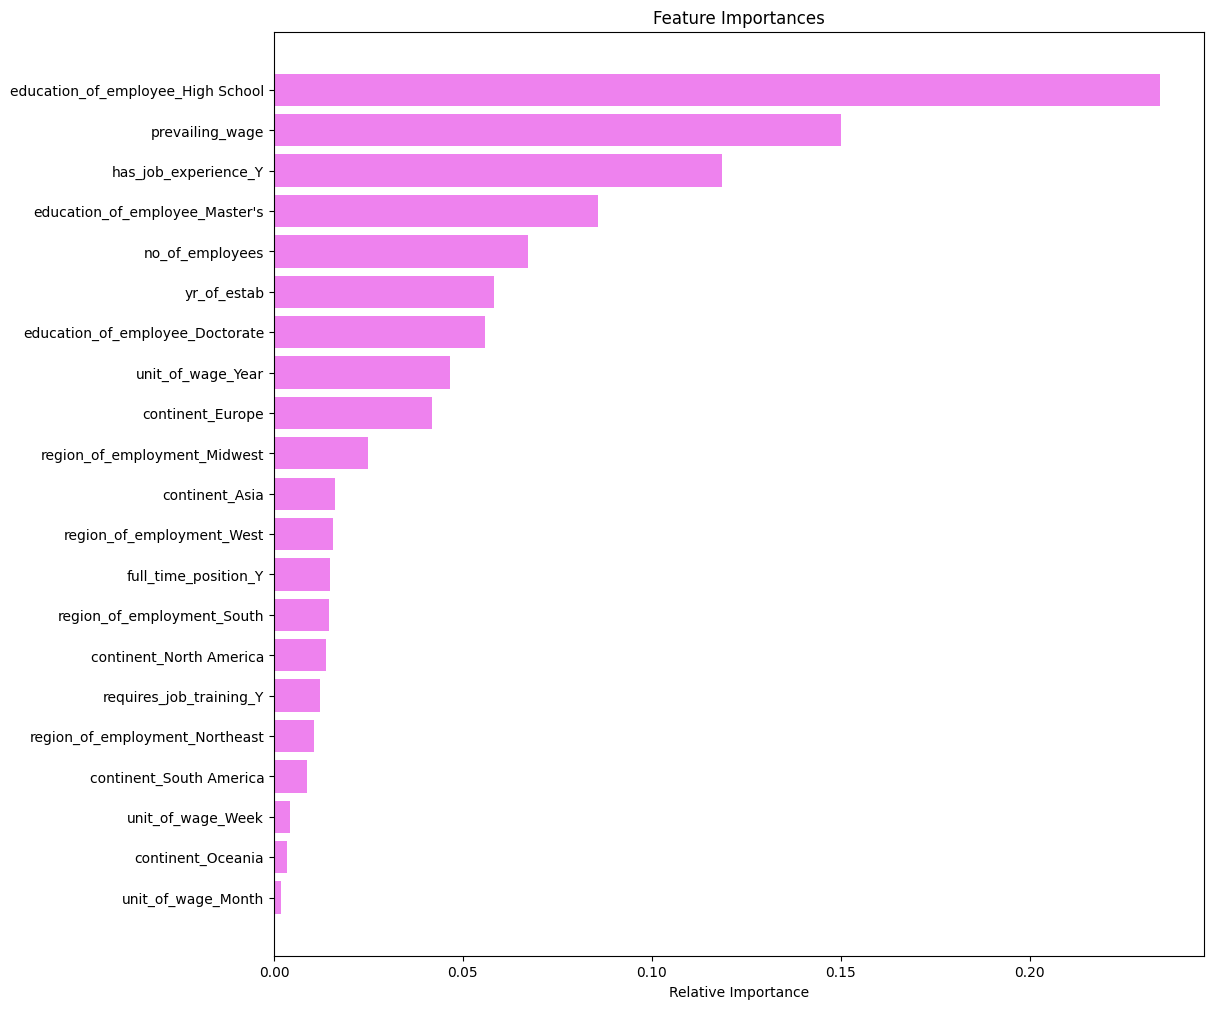

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
